In [1]:
import os
import cv2 
import numpy as np
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import  matplotlib.pyplot as plt

In [2]:
train_path = r'D:\Datasets\fruits\5857_1166105_bundle_archive\fruits-360\Training'
test_path = r'D:\Datasets\fruits\5857_1166105_bundle_archive\fruits-360\Test'

train_images = list()
train_labels = list()
test_images = list()
test_labels = list()
label_legend = dict()
for i, n in enumerate(os.listdir(train_path)):
    label_legend[n] = i
for di in os.listdir(train_path):
    d = os.path.join(train_path, di)
    for img in os.listdir(d):
        pat = os.path.join(d, img)
        im = cv2.imread(pat)  
        im_res = cv2.resize(im, (32, 32))
        train_images.append(im_res)
        train_labels.append(label_legend[di])
for di in os.listdir(test_path):
    d = os.path.join(test_path, di)
    for img in os.listdir(d):
        pat = os.path.join(d, img)
        im = cv2.imread(pat)  
        im_res = cv2.resize(im, (32, 32))
        test_images.append(im_res)
        test_labels.append(label_legend[di])

In [4]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dense(300, activation='relu'),
    layers.Dense(131),
])
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer="adam", loss=loss, metrics=['accuracy'])
history = model.fit(np.array(train_images), np.array(train_labels), epochs=2, validation_data=(np.array(test_images), np.array(test_labels)))

Train on 67692 samples, validate on 22688 samples
Epoch 1/2
67692/67692 [==============================] - 36s 539us/sample - loss: 1.4624 - accuracy: 0.6129 - val_loss: 0.5295 - val_accuracy: 0.8402
Epoch 2/2
67692/67692 [==============================] - 33s 482us/sample - loss: 0.3002 - accuracy: 0.9033 - val_loss: 0.4164 - val_accuracy: 0.8903


In [31]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TF Lite model.
with tf.io.gfile.GFile('model.tflite', 'wb') as f:
    f.write(tflite_model)

ConverterError: See console for info.




In [4]:
lab = open("labels.txt", "w")
for k, v in label_legend.items():
    lab.write(f"{v}:{k}")
    lab.write("\n")
lab.close()

In [24]:
pred = model.predict(np.expand_dims(np.array(test_images)[10000], axis=0))

In [25]:
print(np.argmax(pred))

59


{'Apple Braeburn': 0, 'Apple Crimson Snow': 1, 'Apple Golden 1': 2, 'Apple Golden 2': 3, 'Apple Golden 3': 4, 'Apple Granny Smith': 5, 'Apple Pink Lady': 6, 'Apple Red 1': 7, 'Apple Red 2': 8, 'Apple Red 3': 9, 'Apple Red Delicious': 10, 'Apple Red Yellow 1': 11, 'Apple Red Yellow 2': 12, 'Apricot': 13, 'Avocado': 14, 'Avocado ripe': 15, 'Banana': 16, 'Banana Lady Finger': 17, 'Banana Red': 18, 'Beetroot': 19, 'Blueberry': 20, 'Cactus fruit': 21, 'Cantaloupe 1': 22, 'Cantaloupe 2': 23, 'Carambula': 24, 'Cauliflower': 25, 'Cherry 1': 26, 'Cherry 2': 27, 'Cherry Rainier': 28, 'Cherry Wax Black': 29, 'Cherry Wax Red': 30, 'Cherry Wax Yellow': 31, 'Chestnut': 32, 'Clementine': 33, 'Cocos': 34, 'Corn': 35, 'Corn Husk': 36, 'Cucumber Ripe': 37, 'Cucumber Ripe 2': 38, 'Dates': 39, 'Eggplant': 40, 'Fig': 41, 'Ginger Root': 42, 'Granadilla': 43, 'Grape Blue': 44, 'Grape Pink': 45, 'Grape White': 46, 'Grape White 2': 47, 'Grape White 3': 48, 'Grape White 4': 49, 'Grapefruit Pink': 50, 'Grapefrui

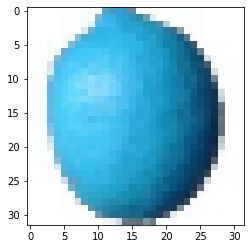

In [30]:
plt.imshow(np.array(test_images)[10000])
print(label_legend)